# Resampling Methods

### Student: Rodolfo Lerma

# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Secom.csv')

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488

In [3]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


### Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [4]:
#data.replace('!', np.nan, inplace=True)
data.replace(to_replace=r' *\!', value=np.nan, inplace=True, regex=True)

Question 1.2 Confirm that the change has worked

In [5]:
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [6]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100,85.1011,0.1235,NaN,NaN,...,137.7844,0.4987,0.0181,0.004,3.6275,0.0117,0.0162,0.0045,137.784,1


### Question 1.3: Fill the missing values with zeroes

In [7]:
data.fillna(0, inplace=True)

In [8]:
#Validate that the missing values were replaced
data.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,0,0.5005,0.0118,0.0035,2.363,0,0,0,0,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,0,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [9]:
data.tail()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100,98.4689,0.1205,1.4333,-0.0061,...,0,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100,99.4122,0.1208,0,0,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1
1566,2944.92,2450.76,2195.4444,2914.1792,1.5978,100,85.1011,0.1235,0,0,...,137.7844,0.4987,0.0181,0.004,3.6275,0.0117,0.0162,0.0045,137.784,1


In [10]:
data.isnull().sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
Sensor 6      0
Sensor 7      0
Sensor 8      0
Sensor 9      0
Sensor 10     0
Sensor 11     0
Sensor 12     0
Sensor 13     0
Sensor 14     0
Sensor 15     0
Sensor 16     0
Sensor 17     0
Sensor 18     0
Sensor 19     0
Sensor 20     0
Sensor 21     0
Sensor 22     0
Sensor 23     0
Sensor 24     0
Sensor 25     0
Sensor 26     0
Sensor 27     0
Sensor 28     0
Sensor 29     0
Sensor 30     0
             ..
Sensor 562    0
Sensor 563    0
Sensor 564    0
Sensor 565    0
Sensor 566    0
Sensor 567    0
Sensor 568    0
Sensor 569    0
Sensor 570    0
Sensor 571    0
Sensor 572    0
Sensor 573    0
Sensor 574    0
Sensor 575    0
Sensor 576    0
Sensor 577    0
Sensor 578    0
Sensor 579    0
Sensor 580    0
Sensor 581    0
Sensor 582    0
Sensor 583    0
Sensor 584    0
Sensor 585    0
Sensor 586    0
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int6

In [11]:
data.shape

(1567, 591)

In [12]:
columns = data.columns.tolist()
for i in columns:
    data[i] = pd.to_numeric(data[i])

In [13]:
data.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,99.106573,100.209538,0.121122,1.460995,-0.000840,...,38.623767,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,0.933631
std,200.204648,184.815753,209.206773,458.937272,56.104457,9.412812,11.363940,0.012831,0.090461,0.015107,...,72.871466,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.249005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,0.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,100.000000,97.762200,0.121100,1.410950,-0.010800,...,0.000000,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,100.000000,101.492200,0.122400,1.461500,-0.001300,...,0.000000,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.000000,104.530000,0.123800,1.516850,0.008400,...,57.449750,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target',data=data)
plt.show()

<Figure size 640x480 with 1 Axes>

### Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

**Assumption:**
- There is another unseen set of data that will be used for the final Test once the model and hyperparameters are selected thru the train/validation set.

In [15]:
columns.remove('Target')
features = data[columns]
target = data['Target']

In [16]:
#First split the Training/Validation and the Testing Set
#X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

## To do list:
- Scale the data
    - Ensure that is done per cross validation fold
- Do some Feature Selection based on values

In [17]:
from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(class_weight = 'balanced', solver = 'saga',max_iter = 1000)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

### Plot ROC Curve

Accuracy: 0.9044585987261147
AUC: 0.55


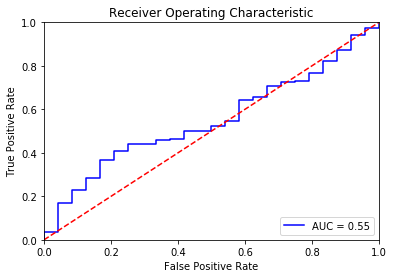

In [19]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

# Note:
Since we are using Recursive Feature Elimination, it is critical to do some data scaling to help on the convergance.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score

model = LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5)

options = [2,5,10,50]
accuracy = []
precision = []
recall = []
for i in options:
    rfe = RFE(model, n_features_to_select = i)
    rfe.fit(X_train_std_scaled, y_train)
    y_pred = rfe.predict(X_test_std_scaled)
    lr_acc = accuracy_score(y_test, y_pred)   
    lr_precision = precision_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred)
    accuracy.append(lr_acc)
    precision.append(lr_precision)
    recall.append(lr_recall)
    print("\n# of RFE:",i,"Accuracy:", round(lr_acc,4), ",Precision:", round(lr_precision,4), ",Recall:", round(lr_recall,4))


# of RFE: 2 Accuracy: 0.9236 ,Precision: 0.9236 ,Recall: 1.0

# of RFE: 5 Accuracy: 0.9204 ,Precision: 0.9233 ,Recall: 0.9966

# of RFE: 10 Accuracy: 0.9204 ,Precision: 0.9233 ,Recall: 0.9966

# of RFE: 50 Accuracy: 0.8885 ,Precision: 0.9264 ,Recall: 0.9552


In [24]:
#Selected model based on the results above:

rfe = RFE(model, n_features_to_select = 52)
rfe.fit(X_train_std_scaled, y_train)
y_pred = rfe.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

Accuracy: 0.8980891719745223
AUC: 0.5017241379310344


### Plot ROC Curve

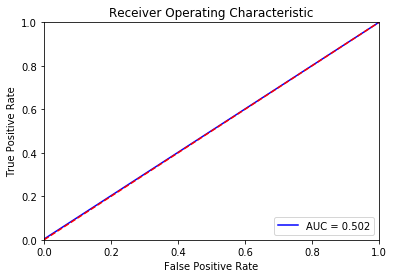

In [27]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# # calculate the fpr and tpr for all thresholds of the classification
# probs = regr.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
# roc_auc = metrics.auc(fpr, tpr)
# print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    stratify=target, 
                                                    test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std_scaled = scaler.transform(X_train)
X_test_std_scaled = scaler.transform(X_test)

### Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [32]:
regr = RFE(LogisticRegression(solver='lbfgs', max_iter= 10000, random_state=5), n_features_to_select=40, step=1)
regr.fit(X_train_std_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=10000, random_state=5),
    n_features_to_select=40)

AUC: 0.49829351535836175


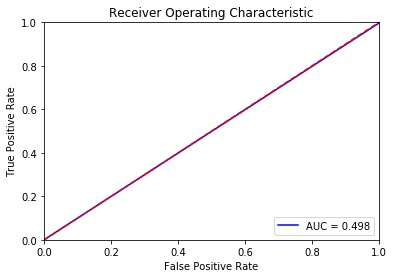

In [33]:
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
y_pred = regr.predict(X_test_std_scaled)
lr_acc = accuracy_score(y_test, y_pred)

probs = regr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = #To Do


### Implement the model and then create the ROC Curve

In [ ]:
# Plot the ROC curve



### Question 4.2: Summarize your findings of all above models

### Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary(or short description of your thinking in applying this week's learning to the solution)of your experience in this assignment. Include:
                                                                      
- What was your incoming experience with this model, if any?
- What steps you took, what obstacles you encountered.
- How you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)